## Skapa data

Vi börjar som tidigare: Vi genererar slumpmässig datapunkter uniformt på $[0,1]^2$ och väljer en linje som bestämmer om punkterna får label 0 eller 1. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(131)
N = 200 #number of data points
x = np.random.uniform(0,1, size = (N,2))

#n,c are the parameters fo for the hyperplane separating the two sets n*x=c
n = np.array([1,1.5])
c = 1.2
y = np.zeros((N,)) #labels
for i in range(N):
    if (np.dot(n,x[i,:])>c):
        y[i] = 1

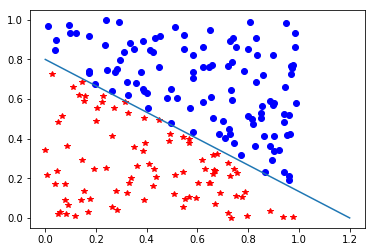

In [2]:
plt.plot(x[y==0,0],x[y==0,1],'r*') #plots all points with albels 0
plt.plot(x[y==1,0],x[y==1,1],'bo') #plots all points with labels 1
plt.plot([0,c/n[0]],[c/n[1],0]) #plots the separating hyperplane

Nu lägger vi till små slumptal som "stör" våra x-värden, dvs vi förskjuter punkterna lite grann så att några hamnar på "fel" sida av linjen

In [3]:
noise = 0.05*np.random.randn(N,2)
x += noise

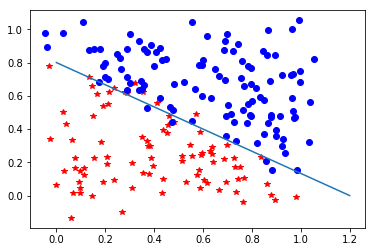

In [4]:
plt.plot(x[y==0,0],x[y==0,1],'r*') #plots all points with albels 0
plt.plot(x[y==1,0],x[y==1,1],'bo') #plots all points with labels 1
plt.plot([0,c/n[0]],[c/n[1],0]) #plots the separating hyperplane

Nu delar vi upp våra datapunkter: de flesta använder vi för att träna vår "nätverk", men en del blir testdata som bara används efteråt för att kontrollera hur bra lösning vi fick. För att göra det väljer vi slumpmässig 20% av våra punkter som ska bli testdatan. Alla andra punkter blir träningsdata.

In [5]:
N_test = int(0.2*N);   # number of test data
N_train = N - N_test;  # number of training data

test_ind = np.random.choice(N, size=N_test, replace=False)
x_test = x[test_ind, :]
y_test = y[test_ind]

x_train = np.delete(x, test_ind, 0)
y_train = np.delete(y, test_ind, 0)

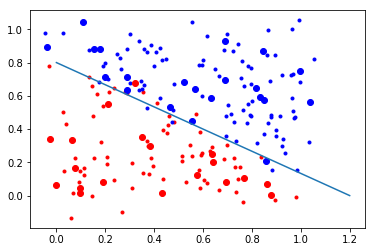

In [6]:
plt.plot(x[y==0,0],x[y==0,1],'r.') #plots all points with albels 0
plt.plot(x[y==1,0],x[y==1,1],'b.') #plots all points with labels 1

plt.plot(x_test[y_test==0,0],x_test[y_test==0,1],'ro') #plots all points with albels 0
plt.plot(x_test[y_test==1,0],x_test[y_test==1,1],'bo') #plots all points with labels 1
plt.plot([0,c/n[0]],[c/n[1],0]) #plots the separating hyperplane

In [7]:
def plot_points(x, y, w, c, n):

    plt.figure()
    plt.plot(x_train[y_train==0,0],x_train[y_train==0,1],'r*') #plots all points with albels 0
    plt.plot(x_train[y_train==1,0],x_train[y_train==1,1],'bo') #plots all points with labels 1
    plt.plot([0,c/n[0]],[c/n[1],0]) #plots the separating hyperplane
    plt.plot([0,-w[0]/w[1]],[-w[0]/w[2],0],'r')
    plt.xlabel('x')
    plt.ylabel('y')

## Stochastic gradient descent

In [8]:
# activation function => logistic function
def sigmoid(X, w):
    a = np.dot(X, w)
    f = 1.0/(1.0 + np.exp(-a))
    df_da = np.exp(-a)/(1 + np.exp(-a))**2
    return f, df_da
    
def loss(y, f):
    L = -np.dot(y, np.log(f)) - np.dot((1-y), np.log(1 - f))   # since y in {0, 1}, one of the two parts vanishes each time 
    return L

def loss_grad(y, f):
    dL_df = -y/f + (1-y)/(1-f)    
    #if y == 1:
    #    dL_df = -1./f
    #else:
    #    dL_df = 1./(1-f)
    return dL_df

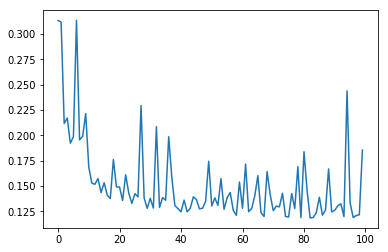

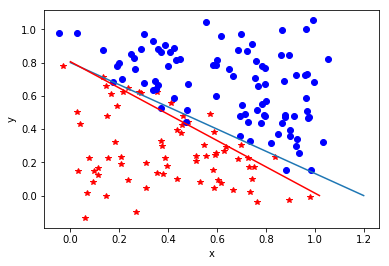

In [9]:
num_weights = 3
X = np.ones((N_train, 3))
X[:, 1:] = x_train
y = y_train

w = np.zeros((num_weights, ))
epochs = 100
L_list = np.zeros((epochs,))  # save loss development
alfa = 1                      # learning rate

# stochastic gradient descent
for i in range(epochs):
    for j in range(N_train):
        # choose one data point
        ind = np.random.choice(N_train)
        X_ind = X[ind, :]
        y_ind = y[ind]
    
        (f, df_da) = sigmoid(X_ind, w)
        dL_df = loss_grad(y_ind, f)
        dL_dw = dL_df*df_da*X_ind

        w = w - alfa*dL_dw
    
    # every N iterations: check loss function value
    L_tot = 0
        
    # add upp values for all x_i    
    for j in range(N_train):
        X_ind = X[j, :]
        y_ind = y[j]
        
        f, df_da = sigmoid(X_ind, w)
        L_tot += loss(y_ind, f)
            
    L_list[i] = L_tot/X.shape[0]
                
plt.plot(L_list)
plot_points(x, y, w, c, n)

## Gradient descent

In [10]:
# activation function => logistic function
def sigmoid(X, W):
    a = np.dot(X, W.T)
    f = 1.0/(1.0 + np.exp(-a))
    df_da = np.exp(-a)/(1 + np.exp(-a))**2
    return f, df_da
    
def loss(y, f):
    L = -np.dot(y, np.log(f)) - np.dot((1-y), np.log(1 - f))   # since y in {0, 1}, one of the two parts vanishes each time 
    return L

def loss_grad(y, f):
    f[f == 0] = 1e-8
    f[f == 1] = 1 - 1e-8
    
    dL_df = -y/f + (1-y)/(1-f)    
    #if y == 1:
    #    dL_df = -1./f
    #else:
    #    dL_df = 1./(1-f)
    return dL_df

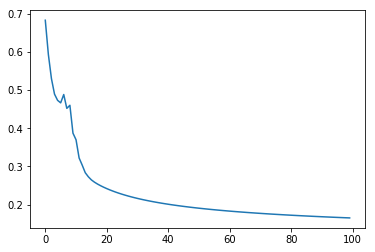

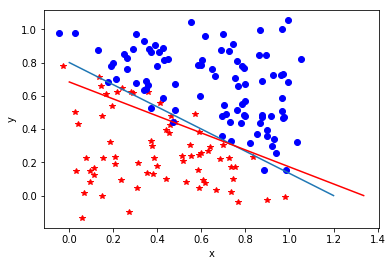

In [11]:
W = np.random.rand(3, )
epochs = 100
L_list = np.zeros((epochs,))  # save loss development
alfa = 0.2                   # learning rate

X = np.ones((N_test, 3))
X[:, 1:] = x_test
y = y_test

# gradient descent
for i in range(epochs):
    
    (f, df_da) = sigmoid(X, W)
    dL_df = loss_grad(y, f)

    dL_da = np.multiply(dL_df, df_da)
    dL_dw = np.dot(dL_da.T, X)

    W = W - alfa*dL_dw
    
    # check value of loss function
    L_list[i] = loss(y, f)/X.shape[0]

                
plt.plot(L_list)
plot_points(x, y, W, c, n)

## Newton

In [12]:
def gradient(y, f, X):
    dL_dw = np.dot(X.T,np.reshape((f-y), (X.shape[0],1)))
    return np.squeeze(dL_dw)

def hessian(y, f, X):
    H = np.dot(X.T, np.dot(np.diag(f)*np.diag(1-f), X))
    return H

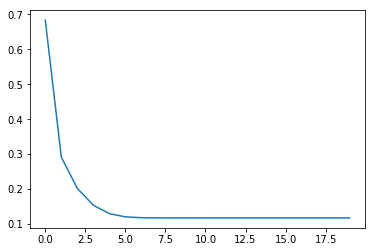

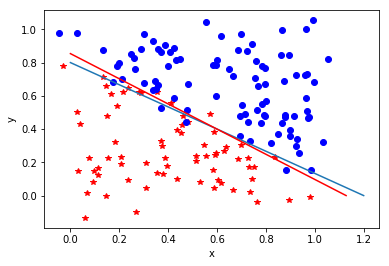

In [13]:
W = np.random.rand(3, )
epochs = 20
L_list = np.zeros((epochs,))  # save loss development
alfa = 1                    # learning rate

X = np.ones((N_train, 3))
X[:, 1:] = x_train
y = y_train

# gradient descent
for i in range(epochs):
    
    (f, df_da) = sigmoid(X, W)
    dL_df = loss_grad(y, f)

    dL_da = np.multiply(dL_df, df_da)
    dL_dw = np.dot(dL_da.T, X)
    grad = gradient(y, f, X)
    H = hessian(y, f, X)
    
    H = H + 0.005*np.identity(3)

    #W = W - alfa*dL_dw
    h = np.linalg.solve(H, grad)
    W = W - alfa*h
    
    # check value of loss function
    L_list[i] = loss(y, f)/N_train

                
plt.plot(L_list)
plot_points(x, y, W, c, n)

## Gauss-Newton

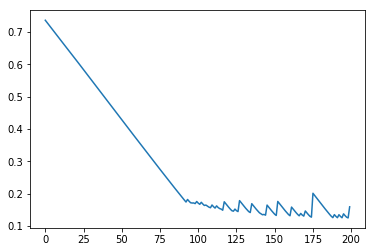

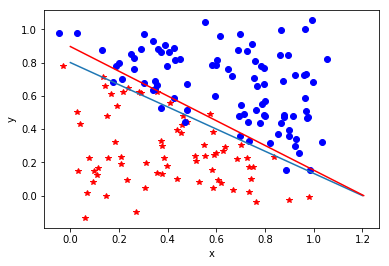

In [14]:
W = np.random.rand(3, )
epochs = 200
L_list = np.zeros((epochs,))  # save loss development
alfa = 1  

X = np.ones((N_train, 3))
X[:, 1:] = x_train
y = y_train

# gradient descent
for i in range(epochs):
    
    (f, df_da) = sigmoid(X, W)
    dL_df = loss_grad(y, f)
    dL_da = np.multiply(dL_df, df_da)
    dL_dw = np.reshape(np.dot(dL_da.T, X), (3, 1))
    
    '''
    H = hessian(y, f, X)    
    H = H + 0.005*np.identity(3)
    h = np.linalg.solve(H, grad)
    '''

    J = dL_dw.T * dL_dw + 0.05*np.identity(3)
    
    #h = np.squeeze(np.linalg.solve(H, dL_dw))
    h = np.squeeze(np.linalg.solve(J, dL_dw))
  
    #alfa = back_line(y, X, W, h)
    W = W - alfa*h
    

    
    # check value of loss function
    L_list[i] = loss(y, f)/N_train

                
plt.plot(L_list)
plot_points(x, y, W, c, n)


## BFGS

Fortfarande problem ...


In [15]:
def back_line(y, X, W, p_dir):
    alfa = 1
    rho = 0.6
    c = 0.9
    
    (f, df_da) = sigmoid(X, W)
    L = loss(y, f)
    dL_dw = gradient(y, f, X)
    
    tol = 1e-2
    thresh = c*np.dot(dL_dw.T, p_dir)
    (f_new, df_da) = sigmoid(X, W - alfa*p_dir)
    newval = loss(y, f_new)
    iter = 0
    
    while newval > L + alfa*thresh and iter < 5:
        (f_new, df_da) = sigmoid(X, W - alfa*p_dir)
        newval = loss(y, f_new)
        alfa *= rho
        iter += 1

    return alfa
    

num it: 13


/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in multiply
/usr/lib/python3/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in multiply
/usr/lib/python3/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply


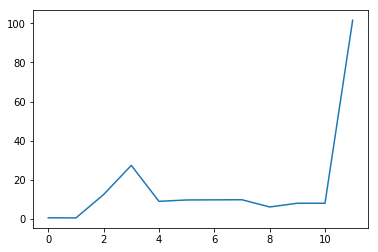

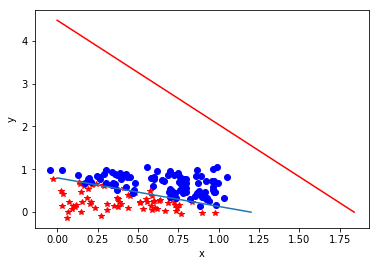

In [16]:
W = np.zeros((3,))
W = np.random.rand(3, )
epochs = 30
L_list = np.zeros((epochs,))  # save loss development
alfa = 0.1  

X = np.ones((N_train, 3))
X[:, 1:] = x_train
y = y_train
G = np.identity(3)   # approximation to H^(-1)
I = np.identity(3)
dL_dw = np.ones((3,1))

# gradient descent
for i in range(epochs):
    
    (f, df_da) = sigmoid(X, W)
    dL_df = loss_grad(y, f)

    dL_da = np.multiply(dL_df, df_da)
    dL_dw_old = dL_dw;
    dL_dw = np.reshape(np.dot(dL_da.T, X), (3, 1))
   
    q = alfa*np.dot(G, dL_dw);
    v = dL_dw - dL_dw_old;
    
    if np.isnan(np.dot(q.T, q)):
        print("num it:", i)
        L_list = L_list[:i-1]
        break
        
    dt = 1./np.dot(q.T, v)

    alfa = back_line(y, X, W, np.squeeze(q))
    W = W - alfa*np.squeeze(q)
    
    # update approximate inv. hessian
    G1 = I - dt*np.dot(q, v.T)
    G2 = I - dt*np.dot(v, q.T)
    G3 = dt*np.dot(q, q.T)
    G = G1@G@G2+G3
    
    
    # check value of loss function
    L_list[i] = loss(y, f)/N_train

                
plt.plot(L_list)
plot_points(x, y, W, c, n)
